In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('emails.csv')

In [3]:
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [5]:
df['length'] = df['text'].apply(len)
df

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235
...,...,...,...
5723,Subject: re : research and development charges...,0,1189
5724,"Subject: re : receipts from visit jim , than...",0,1167
5725,Subject: re : enron case study update wow ! a...,0,2131
5726,"Subject: re : interest david , please , call...",0,1060


<Axes: ylabel='Frequency'>

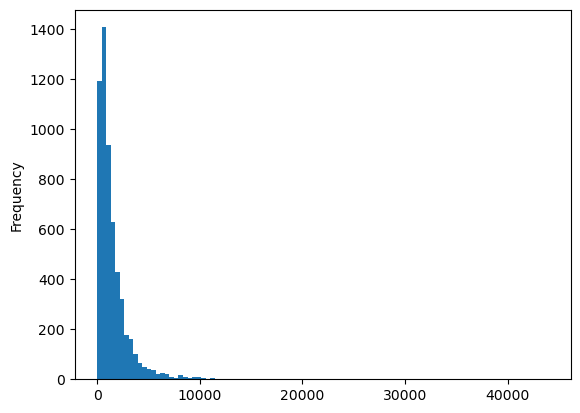

In [6]:
df['length'].plot(bins = 100, kind = 'hist')

In [7]:
df.describe()

,spam,length
count,5728.000000,5728.000000
mean,0.238827,1556.768680
std,0.426404,2042.649812
min,0.000000,13.000000
25%,0.000000,508.750000
50%,0.000000,979.000000
75%,0.000000,1894.250000
max,1.000000,43952.000000


In [8]:
df[df['length'] == 43952]['text'].iloc[0]

'Subject: from the enron india newsdesk - april 27 th newsclips  fyi news articles from indian press .  - - - - - - - - - - - - - - - - - - - - - - forwarded by sandeep kohli / enron _ development on 04 / 27 / 2001 08 : 24 am - - - - - - - - - - - - - - - - - - - - - - - - - - -  nikita varma  04 / 27 / 2001 07 : 51 am  to : nikita varma / enron _ development @ enron _ development  cc : ( bcc : sandeep kohli / enron _ development )  subject : from the enron india newsdesk - april 27 th newsclips  friday apr 27 2001 , http : / / www . economictimes . com / today / cmo 3 . htm  dpc board empowers md to cancel mseb contract  friday apr 27 2001 , http : / / www . economictimes . com / today / 27 compl 1 . htm  mseb pays rs 134 cr under \' protest \' to dpc  friday , april 27 , 001 , http : / / www . businessstandard . com / today / economy 4 . asp ? menu = 3  enron india md authorised to terminate ppa  friday , april 27 , 2001 , http : / / www . financialexpress . com / fe 20010427 / topl 

In [9]:
ham = df[df['spam'] == 0]
ham

,text,spam,length
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0,1188
1369,Subject: sacramento weather station fyi - - ...,0,1997
1370,Subject: from the enron india newsdesk - jan 1...,0,7902
1371,Subject: re : powerisk 2001 - your invitation ...,0,3644
1372,Subject: re : resco database and customer capt...,0,5535
...,...,...,...
5723,Subject: re : research and development charges...,0,1189
5724,"Subject: re : receipts from visit jim , than...",0,1167
5725,Subject: re : enron case study update wow ! a...,0,2131
5726,"Subject: re : interest david , please , call...",0,1060


In [10]:
spam = df[df['spam'] == 1]
spam

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235
...,...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1,347
1364,Subject: would you like a $ 250 gas card ? do...,1,188
1365,"Subject: immediate reply needed dear sir , i...",1,3164
1366,Subject: wanna see me get fisted ? fist bang...,1,734


<Axes: ylabel='Frequency'>

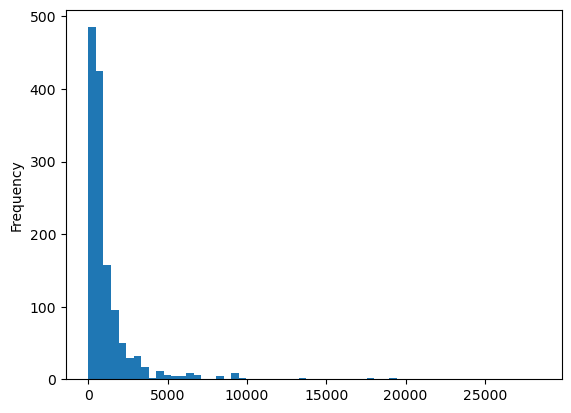

In [11]:
spam['length'].plot(bins=60, kind='hist')

<Axes: ylabel='Frequency'>

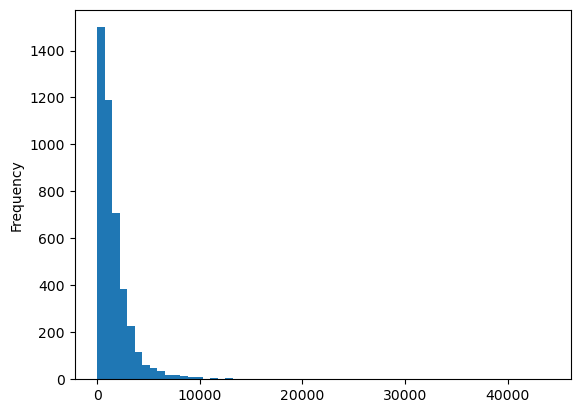

In [12]:
ham['length'].plot(bins=60, kind='hist') 

In [13]:
print( 'Spam percentage =', (len(spam) / len(df) )*100,"%")

Spam percentage = 23.88268156424581 %


In [14]:
print( 'Ham percentage =', (len(ham) / len(df) )*100,"%")

Ham percentage = 76.11731843575419 %


[Text(0, 0, 'Ham'), Text(1, 0, 'Spam')]

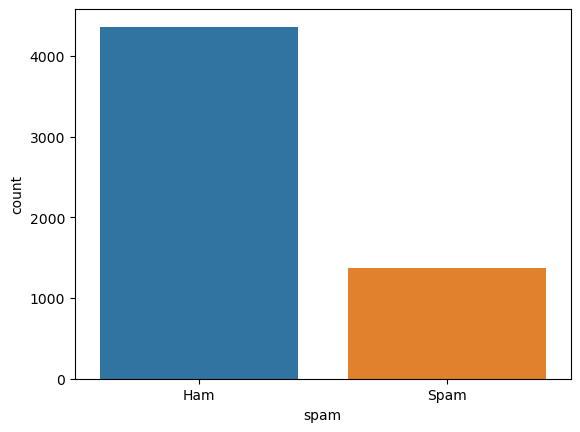

In [15]:
ax = sns.countplot(x='spam', data=df)
ax.set_xticklabels(['Ham', 'Spam'])

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
spamham_vectorizer = vectorizer.fit_transform(df['text'])

In [17]:
print(vectorizer.get_feature_names_out())

['00' '000' '0000' ... 'zzn' 'zzncacst' 'zzzz']


In [18]:
print(spamham_vectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [19]:
spamham_vectorizer.shape

(5728, 37303)

In [20]:
label = df['spam'].values
label.shape

(5728,)

In [21]:
from sklearn.model_selection import train_test_split
X = spamham_vectorizer
y = label
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [22]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = NB_classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

<Axes: >

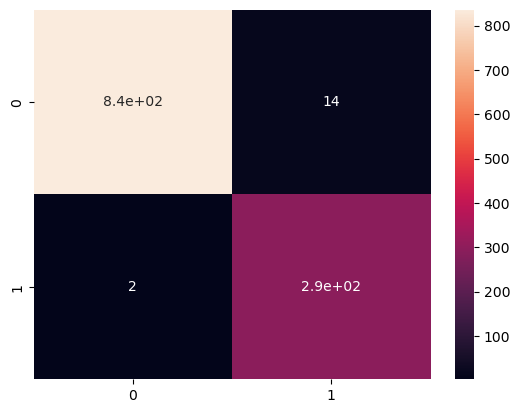

In [24]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       850
           1       0.95      0.99      0.97       296

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.98      1146
weighted avg       0.99      0.99      0.99      1146



In [26]:
test = ['BUMPER JACKPOT!!', "Hi sir, this message is to reach you out for the below mentioned issue."]
test_vectorizer = vectorizer.transform(test)
pred = NB_classifier.predict(test_vectorizer)
pred

array([1, 0], dtype=int64)

In [27]:
for i in range(len(pred)): 
    if(pred[i]==1):
        print("Message - {} , is a Spam Message.\n".format(test[i]))
    else:
        print("Message - {} , is Not a Spam Message.\n".format(test[i]))

Message - BUMPER JACKPOT!! , is a Spam Message.

Message - Hi sir, this message is to reach you out for the below mentioned issue. , is Not a Spam Message.

